# Optimial expression to find

$$Y = 0.4X_2^2 + 2X_4 + 2$$

# Import packages

In [1]:
from atgfe.GeneticFeatureEngineer import GeneticFeatureEngineer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from yellowbrick.regressor import ResidualsPlot, PredictionError
from lightgbm import LGBMRegressor

In [2]:
df = pd.read_csv('./data/generated_4.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,802,189,916,684,437,454,668,15658.4
1,512,470,328,658,497,660,844,89678.0
2,816,954,852,992,815,923,578,366032.4
3,248,134,843,218,152,662,739,7620.4
4,552,410,800,232,299,582,37,67706.0


In [3]:
target = 'Y'
columns = df.drop(target, axis=1).columns.tolist()

In [4]:
X = df.drop(target, axis=1).copy()
Y = df.loc[:, target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

In [5]:
def display_residual_plot(model):
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()                 

In [6]:
def prediction_error_plot(model):
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)  
    visualizer.poof()     

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [8]:
def score_model(model, X, y):
    evaluation_metric_scorer = make_scorer(rmse, greater_is_better=True)
    scores = cross_val_score(estimator=model, X=X, y=y, cv=10, scoring=evaluation_metric_scorer, n_jobs=-1)
    scores_mean = scores.mean()
    score_std = scores.std()
    print('Mean of metric: {}, std: {}'.format(scores_mean, score_std))

In [9]:
def create_new_model():
    return make_pipeline(StandardScaler(), LinearRegression())

# Using LightGBM

In [10]:
lgbm_model = LGBMRegressor(random_state=7)

In [11]:
score_model(lgbm_model, X, Y)

Mean of metric: 980.2975976486816, std: 97.37702478188326


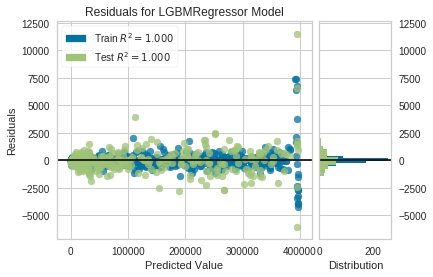

In [12]:
display_residual_plot(lgbm_model)

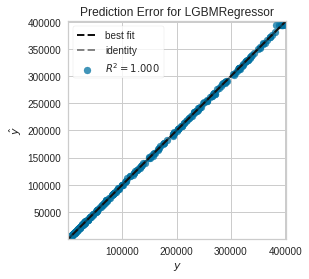

In [13]:
prediction_error_plot(lgbm_model)

# Using Linear Regression

In [14]:
model = create_new_model()

In [15]:
score_model(model, X, Y)

Mean of metric: 30077.26935922344, std: 918.5774622783294


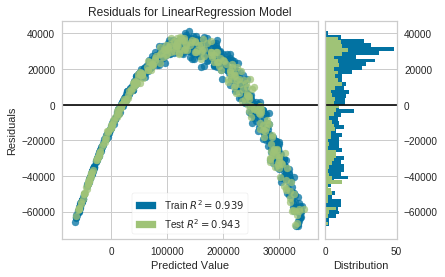

In [16]:
display_residual_plot(model)

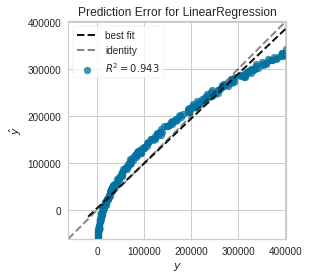

In [17]:
prediction_error_plot(model)

# Using ATgfe

In [18]:
gfe = GeneticFeatureEngineer(model, x_train=X_train, y_train=y_train, numerical_features=columns,
                             number_of_candidate_features=1,
                             number_of_interacting_features=4,
                             evaluation_metric=rmse, minimize_metric=True, verbose=True, cv=10,
                             fit_wo_original_columns=False, enable_feature_transformation_operations=False, enable_weights=True)

2019-11-16 21:27:55,151:INFO: New Engineer created with the following parameters: 
2019-11-16 21:27:55,153:INFO: 
Model type: <class 'sklearn.pipeline.Pipeline'>
Numerical Features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
Number of candidate features: 1
Number of interacting features: 4
Evaluation Metric: rmse
Minimize metric is True 


In [19]:
gfe.fit(population_size=2000, early_stopping_patience=3)

2019-11-16 21:27:55,229:INFO: Start of evolution 
2019-11-16 21:28:24,937:INFO:   Evaluated 2000 individuals 
2019-11-16 21:28:24,939:INFO: -- Generation 1 -- 
2019-11-16 21:28:42,023:INFO:   Evaluated 1175 individuals 
2019-11-16 21:28:42,029:INFO:   Min 3.8740607628318705e-11 
2019-11-16 21:28:42,030:INFO:   Max 1000000000000.0 
2019-11-16 21:28:42,030:INFO:   Avg 52250023418.05564 
2019-11-16 21:28:42,031:INFO:   Std 214813721751.69055 
2019-11-16 21:28:43,983:INFO: Generation: 1, validation scores: [5.97806259e-11 8.05710784e-11 7.96967831e-11 9.98128731e-11
 4.10105607e-10 8.15791464e-11 1.73490760e-10 7.70223573e-11
 6.44654595e-11 6.76106689e-11], mean_score: 1.1941353597658206e-10 
2019-11-16 21:28:43,985:INFO: Generation: 1, best solution features: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', '-1.0*X2**2 - 0.4*X4 + 0.05*X5'] 
2019-11-16 21:28:43,986:INFO: -- Generation 2 -- 
2019-11-16 21:29:01,948:INFO:   Evaluated 1251 individuals 
2019-11-16 21:29:01,954:INFO:   Min 3.6934150

# Use ATgfe

# Apply GFE

In [20]:
X = gfe.transform(X)

In [21]:
X.head(20)

,X1,X2,X3,X4,X5,X6,X7,0.0075*X2**2 + 0.13*X2 + 0.53*X3
0,802,189,916,684,437,454,668,777.9575
1,512,470,328,658,497,660,844,1891.6900
2,816,954,852,992,815,923,578,7401.4500
3,248,134,843,218,152,662,739,598.8800
4,552,410,800,232,299,582,37,1738.0500
5,546,984,482,423,39,289,59,7645.3000
6,847,209,15,355,250,914,198,362.7275
7,73,392,40,511,108,259,730,1224.6400
8,562,637,459,396,955,418,561,3369.3475
9,416,570,371,925,296,390,994,2707.4800


In [22]:
model = create_new_model()

In [23]:
score_model(model, X, Y)

Mean of metric: 9.644142908584958e-11, std: 2.7219973250252678e-11


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=77)

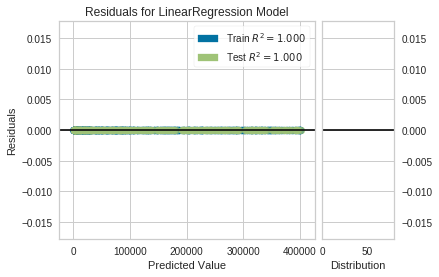

In [25]:
display_residual_plot(model)

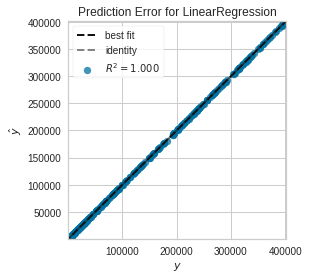

In [26]:
prediction_error_plot(model)